In [18]:
import sys
sys.path.insert(0, '../../')  
import math
import numpy as np
import matplotlib.pyplot as plt 
from gasp import process_data_for_gasp, train_gasp, run_gasp, simulate_ssfp, responses

In [19]:
def normalize(x):
    return x / np.max(x)

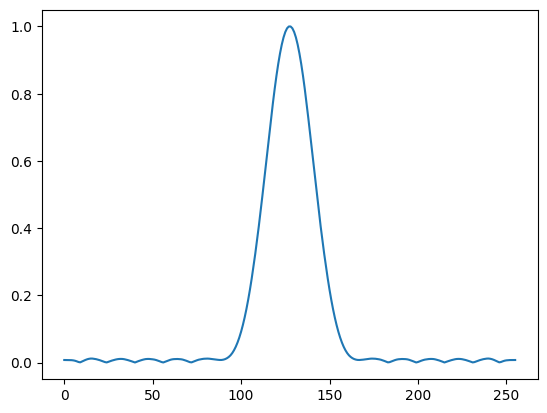

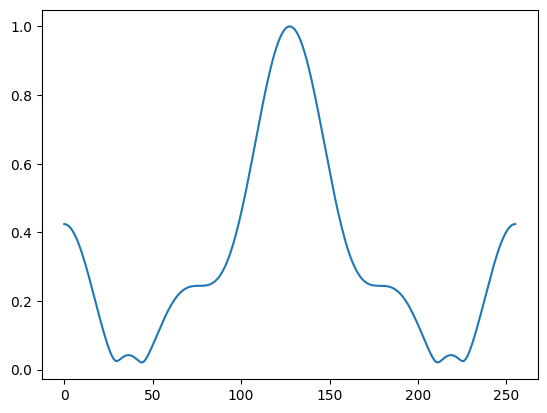

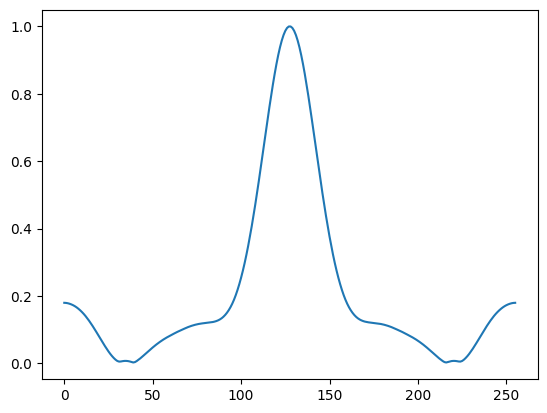

In [20]:
# Simulate ssfp with tissue phantom 
M1 = simulate_ssfp(width = 256, height = 1, npcs = 12, TRs = [3e-3, 6e-3, 12e-3], alpha = np.deg2rad(10), gradient = 2 * np.pi, phantom_type='line-muscle', phantom_padding=0)
M2 = simulate_ssfp(width = 256, height = 1, npcs = 12, TRs = [3e-3, 6e-3, 12e-3], alpha = np.deg2rad(30), gradient = 2 * np.pi, phantom_type='line-muscle', phantom_padding=0)
M3 = simulate_ssfp(width = 256, height = 1, npcs = 12, TRs = [3e-3, 6e-3, 12e-3], alpha = np.deg2rad(90), gradient = 2 * np.pi, phantom_type='line-muscle', phantom_padding=0)
D1 = responses.gaussian(width=256, bw=0.2, shift=0.-2)

# Train gasp model coefficients
method = 'linear'
Ic1, An1 = train_gasp(process_data_for_gasp(M1)[0], D1, method=method)
Ic2, An2 = train_gasp(process_data_for_gasp(M2)[0], D1, method=method)
Ic3, An3 = train_gasp(process_data_for_gasp(M3)[0], D1, method=method)

Ic4 = run_gasp(M3, An1, method=method)
Ic5 = run_gasp(M3, (An1+An2+An3)/3, method=method)

# Plot results
plt.plot(np.abs(normalize(Ic1)).T)
plt.show()
plt.plot(np.abs(normalize(Ic4)).T)
plt.show()
plt.plot(np.abs(normalize(Ic5)).T)
plt.show()